<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Ту будут все import

In [16]:
#загрузка библиотек, методов и пр.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#загрука данных
data = pd.read_csv('/datasets/Churn.csv')
data.shape
data.info()

print('Поиск дубликатов', data.duplicated().sum())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
Поиск дубликатов 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Удалим лишние признаки, такие как: RowNumber,CustomerId, Surname

In [3]:
data = data.drop(columns=['RowNumber','CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
#оценим дисбаланс классов - разницу в количестве данных по ушелдшим и оставшимся клиентам
print(data.pivot_table(index=['Exited'], aggfunc ='count'))

         Age  Balance  CreditScore  EstimatedSalary  Gender  Geography  \
Exited                                                                   
0       7963     7963         7963             7963    7963       7963   
1       2037     2037         2037             2037    2037       2037   

        HasCrCard  IsActiveMember  NumOfProducts  Tenure  
Exited                                                    
0            7963            7963           7963    7237  
1            2037            2037           2037    1854  


***Выводы и предварительному анализу данных:***

1. Как видно из информации  у нас есть пропуски в количественных данных по  графе  Tunure
2. По типам данных:
- в колонке Agency Type, Gender,  HasCrCard, IsActiveMember, Exited изменим тип на bool, так как там только 2 вариата агентств;
- остальные типы соответствуют содержанию.

3. В названии колонок буквы разного регистра, но менять их не будет, так как будет мало работы с определенными колонками.

4. Также заметен дисбанас классов: данных по ушедщим клиентам у нас почти в 4 раз меньше, чем по оставшимся.


In [5]:
#посмотрим уникальные значения по тем, колонкам, где планируем менять тип на bool 
print ('Tenure:', data['Tenure'].unique())
print ('Gender:',data['Gender'].unique())
print ('HasCrCard:',data['HasCrCard'].unique())
print ('IsActiveMember:',data['IsActiveMember'].unique())
print ('Exited:',data['Exited'].unique())

Tenure: [ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]
Gender: ['Female' 'Male']
HasCrCard: [1 0]
IsActiveMember: [1 0]
Exited: [1 0]


Предобразуем данные.

In [6]:

data['Gender'] = data['Gender'].astype(bool)
data['HasCrCard'] = data['HasCrCard'].astype(bool)
data['IsActiveMember'] = data['IsActiveMember'].astype(bool)
data['Exited'] = data['Exited'].astype(bool)

#удалим строки, где есть пропуски по графе "Tenure"
#data = data.dropna(subset=['Tenure'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  bool   
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  bool   
 8   IsActiveMember   10000 non-null  bool   
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(1)
memory usage: 586.1+ KB


По колонкам Gender, HasCrCard, IsActiveMember, Exited данные были преобразованы в булевой тип (bool), так как значения в них содержат один из двух возможных варинатов.

Тажке по графе Tenure были удалены сроки  пропущенными значенимия. Из предположения, что  наличие значений графе, обозначающей сколько лет человек является клиентом банка, могут быть важны при построении модели для прогнозирования покинет ли клиент банк в будущем или нет.  

Пропуски в графе Tenure заменим  на значание -1, данным присвоен тип object, чтобы после кодирования признаки в этом столбце стали категориальными.Код ниже.

In [7]:
#пропуски в графе Tenure заменим на заполним значением -1 , а потом признакми в этой графе сделаем с типом object, 
#чтобы после кодировки они стали категориальынми значаниями

data['Tenure'] = data['Tenure'].fillna(-1)
print(data['Tenure'].unique())
data['Tenure'] = data['Tenure'].astype(object)
data.info()

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. -1.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  bool   
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  bool   
 8   IsActiveMember   10000 non-null  bool   
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  bool   
dtypes: bool(4), float64(2), int64(3), object(2)
memory usage: 586.1+ KB


## Исследование задачи

Разделим данные на 3 выборки - тренировочную, валидационную и для финального тестирования.

***Проведем разбивку данных на выборки и потом кодирование полученных выборок. Проверим, что нет утечек.***

In [9]:
#разобьем данные на выборки
df_train, df_train2 = train_test_split(data, test_size=0.6, random_state=12345, stratify=data['Exited'])
df_valid, df_test = train_test_split(df_train2, test_size=0.5, random_state=12345, stratify=df_train2['Exited'])



#оценим дисбаланс классов - разницу в количестве данных по ушелдшим и оставшимся клиентам

print(' ')
print('Размер тренировочной выборки', df_train.shape)
print('Размер валидационной выборки', df_valid.shape)
print('Размер тестовой выборки', df_test.shape)

 
Размер тренировочной выборки (4000, 11)
Размер валидационной выборки (3000, 11)
Размер тестовой выборки (3000, 11)


In [10]:
#проведем кодирование выборок
df_train = pd.get_dummies(df_train, drop_first=True)
df_valid = pd.get_dummies(df_valid, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

#проверим размер выборок после кодировки, чтобы не было утечек

print('Размер тренировочной выборки', df_train.shape)
print('Размер валидационной выборки', df_valid.shape)
print('Размер тестовой выборки', df_test.shape)

print(df_train.columns)
print(df_train.head())

Размер тренировочной выборки (4000, 22)
Размер валидационной выборки (3000, 22)
Размер тестовой выборки (3000, 22)
Index(['CreditScore', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Tenure_0.0', 'Tenure_1.0', 'Tenure_2.0',
       'Tenure_3.0', 'Tenure_4.0', 'Tenure_5.0', 'Tenure_6.0', 'Tenure_7.0',
       'Tenure_8.0', 'Tenure_9.0', 'Tenure_10.0'],
      dtype='object')
      CreditScore  Gender  Age    Balance  NumOfProducts  HasCrCard  \
3547          662    True   35       0.00              2      False   
4559          528    True   62  133201.17              1      False   
4761          799    True   32  106045.92              2       True   
1787          669    True   25  157848.53              1      False   
4237          498    True   29       0.00              1       True   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  ...  \
3547        

***ВЫВОД*** Выборки после кодирования изменились корректно.

In [11]:

# < создаем переменные для признаков и целевого признака >
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

print('Размер обучающей выборки:', df_train.shape)
print('Размер валидационной выборки:',df_valid.shape)
print('Размер тестовой выборки:',df_test.shape)
print('')

print(target_train.value_counts())
#оценим дисбаланс классов - разницу в количестве данных по ушелдшим и оставшимся клиентам
print('Распределение классов в обучающей выборке', target_train.value_counts())
print('Распределение классов в валидационной выборке', target_valid.value_counts())
print('Распределение классов в тестовой выборке',target_test.value_counts())

Размер обучающей выборки: (4000, 22)
Размер валидационной выборки: (3000, 22)
Размер тестовой выборки: (3000, 22)

False    3185
True      815
Name: Exited, dtype: int64
Распределение классов в обучающей выборке False    3185
True      815
Name: Exited, dtype: int64
Распределение классов в валидационной выборке False    2389
True      611
Name: Exited, dtype: int64
Распределение классов в тестовой выборке False    2389
True      611
Name: Exited, dtype: int64


***Проведем стандартизацию данных***

In [12]:
#список всех численных признаков.
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

#создадим объект стандартизации и обучим его
scaler = StandardScaler()
scaler.fit(features_train[numeric])

#сохраним преобразованные обучающую,валидационную и тестовую  выборки в переменные
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

In [13]:
print(features_train.head())
print(features_train['EstimatedSalary'].head())

      CreditScore  Gender       Age   Balance  NumOfProducts  HasCrCard  \
3547     0.114627    True -0.372209 -1.211706              2      False   
4559    -1.267543    True  2.255662  0.913776              1      False   
4761     1.527741    True -0.664194  0.480462              2       True   
1787     0.186830    True -1.345494  1.307072              1      False   
4237    -1.576984    True -0.956180 -1.211706              1       True   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
3547           False        -1.689972                  0                1   
4559           False         1.194581                  1                0   
4761            True        -1.420522                  0                0   
1787           False        -1.080005                  0                0   
4237           False         1.568483                  0                0   

      ...  Tenure_1.0  Tenure_2.0  Tenure_3.0  Tenure_4.0  Tenure_5.0  \
3547  ...    

 ***Вывод: кодирование и масштабирование данных прошло успешно.***

***Обучим модель и подсчитаем показательF1-меры***

In [19]:

model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_score  = f1_score(target_valid, predicted_valid)
print(f1_score)

0.546583850931677


***Вывод***

Выше был рассчитан показатель F1-меры - это взвешенное гармоническое среднее значение точности и полноты.
Значений F1-меры:

- для модели случайного дерева = 0.546583850931677

Что не плохо, но может быть лучше, так как наилучшее значение этого показателя стремится к 1, а наихудшее к 0.


Улучшим качество модели для прогнозирования, учитывая дисбаланс классов. 

## Борьба с дисбалансом

***Увеличим качество модели, исправив дисбаланс классов***

1.Добавим параметр  class_weight='balanced' в модель DecisionTreeClassifier

2.Изменим выборку

3.Изменим порог

In [22]:
#придадим объектам редкого класса больший вес

model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_score  = f1_score(target_valid, predicted_valid)
print(f1_score)

0.5281018027571581


***Вывод***
Показатель F1-меры уменьшился с 0.546583850931677 до 0.5281018027571581 (на модели случайного дерева) при введении параментра сбалансированости классов.

Теперь увеличим выборку и  сделать объекты редкого класса не такими редкими.

In [23]:
#разделим обучающую выборку на отрицательные и положительные объекты и зададим с помощью функции 
#как будет выглядеть новый массив данных

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    #перемешаем данные функцией shuffle
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print('Распределение классов в обучающей выборке после кор-ки дисбаланса', target_upsampled.value_counts())

Распределение классов в обучающей выборке после кор-ки дисбаланса True     3260
False    3185
Name: Exited, dtype: int64


После корревтировки дисбаланса классов, теперь мы видим, что положительных ответов - 3260, а отрицательных 3185, а до этого было 815 на 3185


Обучим новую модель и выведем показатель F1-меры на экран

In [25]:
from sklearn.metrics import f1_score
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)


print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5803489439853076


***Вывод***

Теперь показатель F1-меры вырос с 0.546583850931677 до 0.5803489439853076.
Этот показатель становится выше, когда мы  увеличиваем выборку и уменьшаетя при  взвешивании классов.

Поэтому в дальнейшем будем спользовать метод увеличения выборки.


***Теперь изменим порог и посмотрим на показатели***

In [26]:
#найдем значений вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#значения вероятностей класса «1» сохраните в переменной probabilities_one_valid
probabilities_one_valid = probabilities_valid[:, 1]
print(probabilities_one_valid[:5])

[0.   0.49 0.03 0.25 0.03]


In [27]:
#переберем значения порогов от 0 до 0.3 с шагом 0.02. Найдите для каждого значения точность 
#и полноту и F1-меру 

for threshold in np.arange(0, 0.6, 0.02):
    predicted_valid = probabilities_one_valid > threshold # < напишите код здесь >
    precision = precision_score(target_valid, predicted_valid)# < напишите код здесь >
    recall = recall_score(target_valid, predicted_valid)# < напишите код здесь >
    #f1_score  = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(threshold, precision, recall))
   

Порог = 0.00 | Точность = 0.207, Полнота = 0.997
Порог = 0.02 | Точность = 0.224, Полнота = 0.992
Порог = 0.04 | Точность = 0.238, Полнота = 0.975
Порог = 0.06 | Точность = 0.254, Полнота = 0.962
Порог = 0.08 | Точность = 0.270, Полнота = 0.941
Порог = 0.10 | Точность = 0.285, Полнота = 0.918
Порог = 0.12 | Точность = 0.305, Полнота = 0.907
Порог = 0.14 | Точность = 0.325, Полнота = 0.897
Порог = 0.16 | Точность = 0.342, Полнота = 0.877
Порог = 0.18 | Точность = 0.364, Полнота = 0.867
Порог = 0.20 | Точность = 0.380, Полнота = 0.845
Порог = 0.22 | Точность = 0.400, Полнота = 0.820
Порог = 0.24 | Точность = 0.417, Полнота = 0.805
Порог = 0.26 | Точность = 0.436, Полнота = 0.787
Порог = 0.28 | Точность = 0.455, Полнота = 0.764
Порог = 0.30 | Точность = 0.470, Полнота = 0.740
Порог = 0.32 | Точность = 0.488, Полнота = 0.718
Порог = 0.34 | Точность = 0.504, Полнота = 0.699
Порог = 0.36 | Точность = 0.521, Полнота = 0.676
Порог = 0.38 | Точность = 0.549, Полнота = 0.655
Порог = 0.40 | Точно

Как видно выше, чем выше порог, тем выше значение точности. Поэтом убудем использовать установленный по умолчанию порог в 0.5.

In [31]:
#1 этап для  RandomForestClassifier
#подберем наилучшую модель случайного леса с числом деревьев от 1 до 50
 
best_depth = 0
best_est = 0
best_result = 0 
for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_upsampled,target_upsampled) #обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_result = result #наибольшая доля правильных ответов
        best_est = est
      

print('Наибольшая доля правильных ответов:', best_result) 
#print('Наилучшая глубина обученного дерева', best_depth)
print('Наилучее число деревьев в модели', best_est)

Наибольшая доля правильных ответов: 0.5902527075812275
Наилучее число деревьев в модели 47


In [32]:
#2 этап для RandomForestClassifier
#подберем наилучшую модель случайного леса с числом деревьев от 1 до 20
 
best_depth = 0
best_est = 0
best_result = 0 
for depth in range(1, 50):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=47)
    model.fit(features_upsampled,target_upsampled) #обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_result = result #наибольшая доля правильных ответов
        best_depth = depth
      

print('Наибольшая доля правильных ответов:', best_result) 
print('Наилучшая глубина обученного дерева', best_depth)

Наибольшая доля правильных ответов: 0.6088992974238877
Наилучшая глубина обученного дерева 13


In [33]:
#посчитаем метрики качества при применении модели логистической регрессии

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced', max_iter=20)
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print("F1:", result)

F1: 0.4643891140706427


***ВЫВОДЫ***
Наилучшиу результат метрики F1 = 0.6088992974238877 дает использование модели Случайного леса (RandomForestClassifier), значит применим ее на финальном тестировани.

## Тестирование модели

In [34]:
#проверим работу модели на тестовой выборке
model = RandomForestClassifier(random_state=12345, n_estimators=47, max_depth=13, criterion='gini')
model.fit(features_upsampled,target_upsampled)
predicted_test = model.predict(features_test) # посчитаем качество модели на валидационной выборке
f1_score = f1_score(target_test, predicted_test)
print(f1_score) 

0.6141975308641976


При финальной проверке на тестовых данных модель получила значение F1-меры= 0.6141975308641976. Требовалость, чтобы оно было больше 0,59.

Поэтому данная модель принимается для дальнейшего прогнозирования.

***Метрика ROC-AUC***

По горизонтали нанесём долю ложноположительных ответов (FPR), а по вертикали — долю истинно положительных ответов (TPR). Переберём значения порога логистической регрессии и проведём кривую. Она называется ROC-кривая, или кривая ошибок 

Сравним ее ROС-кривой случайно модели, которая выглядит как прямая.


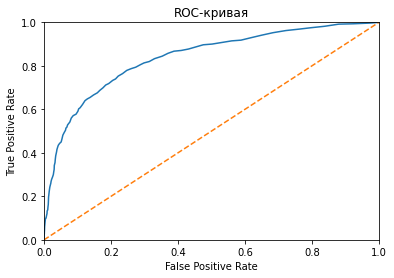

In [35]:
#построим ROC-кривую или кривую ошибок и справним ее со случайной моделью 
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  

plt.figure()

#постройте график
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


По ROC-кривой можно увидеть самое лучшее соотношение TPR и FPR для нашей модели.
По графику наилучшее значение при TPR=0,7 и FPR=0,2.

Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC

In [36]:
#метрика AUC-ROC показывает насколько наша модель отличается от случайно, 
#UC-ROC случайной модели равна 0.5.
#на валидационой выборке

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)

#на тестовой выборке

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)

print("ROC_AUC на валидационной выборке:", auc_roc_valid)
print("ROC_AUC на тестовой выборке:", auc_roc_test)

ROC_AUC на валидационной выборке: 0.8400381179697728
ROC_AUC на тестовой выборке: 0.851283741151308


Это метрика хороша для оценки модели классификации. Она изменяется от 0 до 1, в нашем случае она = 0.851283741151308, что означает нашу модель можно считать хорошей. 

***ИТОГОВЫЙ ВЫВОД ПО ПРОЕКТУ***
 
 
В задачу проекта входило подобрать модель, которая сможет спрогнозировать отток клиентов из банка на основе уже имеющейся информации по имеющимся и оставшимся клиентам за определенный период.

Было предварительно проанализирвоано 10 000 данных, из них удалили 909 строк с информцией по клиентам, где не ыбло указано сколько лет клиент обсулиживется в банке.

После чего было проведено  кодирование и масштабирование данных. Первонаально дисбаланс данных составил: 1 к 3.9. Расчитан он как отношение информации по ушедшим клиентам, п к тем кто осталмя в банке. 

Первый показатель  F1-меры был расчитан без учета дисбаланса классов на модели случайнгого дерева  и составил 0.546583850931677.

Далее учли дисбаланс классов,  увеличил выборку  и подобрали с момощью циклов модель, которая даст наибольший показатель F-1  меры. Так наилучший результат на валидационной выборку показала модель на основе случайного леса с числом деревьев= 47 и глубиной леса = 13, ее показатель  F1 составил 0.6088992974238877.

На финальном тестировоние этот показатель уже был равен 0.6141975308641976.
Что соотвуетсвуте условиям поставленой задачи, где мы должны были достичь мерики более 0.59.

Далее был посчитан показатель ROC-AUC = 0.851283741151308, что считается достаточно высоким и означает, что модель хорошо подходит для прогнозирования.
